In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

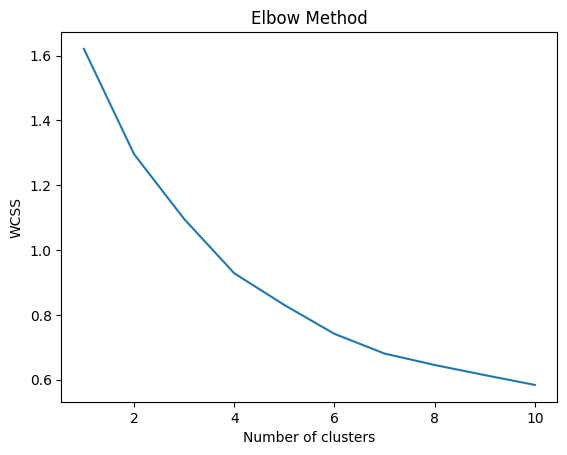

     CustomerID  Cluster
0             1        0
1             2        2
2             3        0
3             4        2
4             5        0
..          ...      ...
195         196        3
196         197        4
197         198        3
198         199        4
199         200        3

[200 rows x 2 columns]


In [7]:
wcss = []
for i in range(1, 11):
    centroids, distortion = kmeans(X_scaled, i)
    wcss.append(distortion)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the Elbow Method, let's choose k=5
k = 5

# Apply k-means clustering with the chosen k
centroids, _ = kmeans(X_scaled, k)
df['Cluster'], _ = vq(X_scaled, centroids)

# Display the resulting clusters
print(df[['CustomerID', 'Cluster']])